#  Ford GoBike System Data
## by: Mohamed Eltedawy

## Preliminary Wrangling


>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# import data and display the first rows of it
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# show the shape of data and columns type and number of missing data
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

### Change data types for some columns to make them appropriate for analysis.

In [4]:
# change data type for date columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
# change data type to category
df = df.astype({'user_type':'category', 'bike_share_for_all_trip':'category'})

In [6]:
# change the Columns from int64 to str
df = df.astype({"start_station_id":'str', "end_station_id":'str', "bike_id":'str'})  

In [7]:
# extract new column for day
df['start_time_day'] =  df['start_time'].dt.day_name()

In [8]:
# make the new column category column
order_var = pd.api.types.CategoricalDtype(ordered=True,
                            categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
df['start_time_day'] = df['start_time_day'].astype(order_var)

In [9]:
# extract new column for hours
df['start_time_hour'] = df['start_time'].dt.hour

In [10]:
# Show the new data types after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [11]:
# show statistical summary for numerical columns
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_time_hour
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,13.458421
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,4.724978
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,9.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,14.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,17.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,23.000000


In [12]:
# show number of different columns data type
df.dtypes.value_counts()

object            6
float64           5
int64             2
datetime64[ns]    2
category          1
category          1
category          1
dtype: int64

In [13]:
# show number of missing values for each columns
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_time_day                0
start_time_hour               0
dtype: int64

In [14]:
# show number of duplicated values
df.duplicated().sum()

0

### What is the structure of your dataset?

> There are 183412 rows with 16 features in the dataset('duration_sec','start_time', 'end_time', 'start_station_id', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_name', 'end_station_latitude', 'end_station_longitude','bike_id', 'user_type', 'member_birth_year', 'member_gender','bike_share_for_all_trip') out of the 16 features 8 are float64 , 7 are object and 4 are int64.

> I didn't find any duplicated values but there are some missing values in some columns, like the start and end stations id and name, and also the gender and birth year for the members.    

> Most of features about the time of the trip begining and ending, and also where the trip start and end and some informations about the bike and the user.


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out how trip duration is dependent on other specifications from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the trip durations highly depend on duration_sec column, but I'll explore some features like user_type , some columns I created from the orignal columns and explore the relationships in the dataset.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

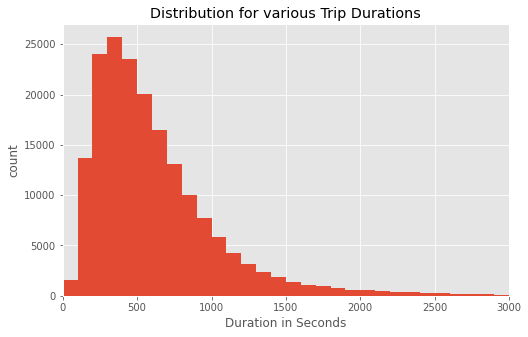

In [15]:
# plot the durations for trip
plt.figure(figsize=[8,5])
bins = np.arange(0,df['duration_sec'].max() + 100 ,100)
plt.hist(df['duration_sec'],bins=bins)
plt.xlim(0,3000)
plt.title("Distribution for various Trip Durations")
plt.xlabel('Duration in Seconds')
plt.ylabel('count');

> We can see that the distribution for average trip durations is right-skewed, so we will take logarithmic transformation for x-axis.    
> Calculating the average for trip durations in seconds seems not informative, so we can change into minutes and after that apply transformation

In [16]:
# create new column from the duration_sec column
df['duration_min'] = df['duration_sec'] / 60
df.drop(columns='duration_sec',axis=1,inplace=True)
df['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

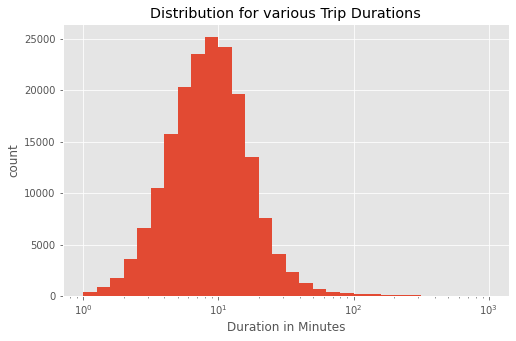

In [17]:
# plot the new column duration_min
plt.figure(figsize=[8,5])
bins =10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(df['duration_min'],bins=bins)
plt.xticks(ticks,labels)
plt.xscale('log')
plt.title('Distribution for various Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('count')
plt.show()

> We can now easily interpret the plot, most of trips seem to be short trips which the duration for trips is around 10 minutes.

In [18]:
# show the number of values for the column
df['start_station_name'].value_counts().head(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

In [19]:
def plotCount(var,title):
    plt.figure(figsize=[8,5])
    sns.countplot(data=df , y =var,order=df[var].value_counts().head(10).index,color=sns.color_palette()[6])
    plt.title(title);

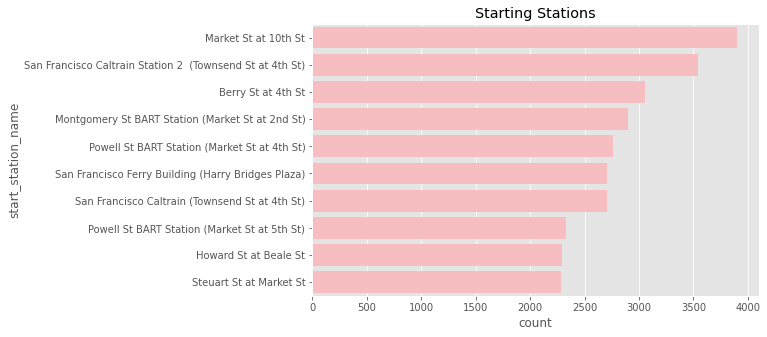

In [20]:
plotCount('start_station_name','Starting Stations')

> We can see that Market St at 10th St seems that most of trips started from it also San Francisco Caltrain Station 2, Berry St at 4th St came after it.

In [21]:
df['end_station_name'].value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

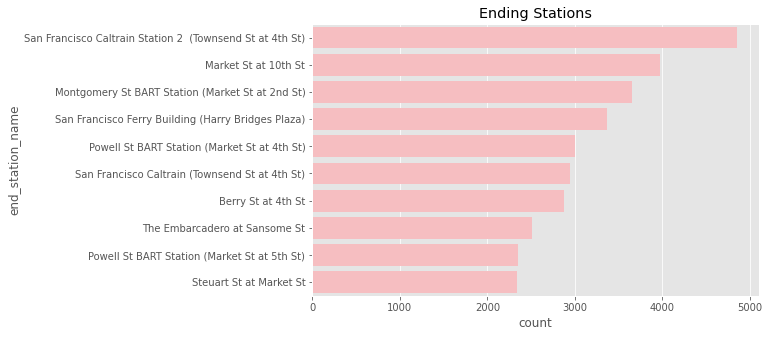

In [22]:
plotCount('end_station_name','Ending Stations')

> We can see that San Francisco Caltrain Station 2 is the most ending station for trips.

In [23]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

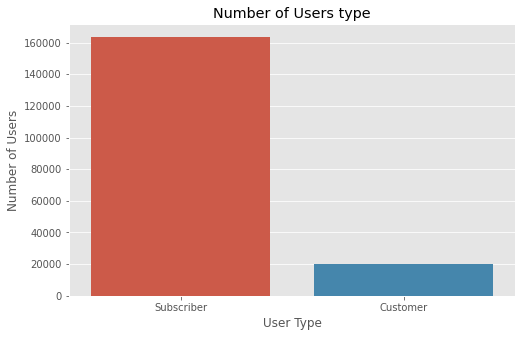

In [24]:
plt.figure(figsize=[8,5])
sns.countplot(data=df,x='user_type',order=df['user_type'].value_counts().index)
plt.title('Number of Users type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

> we can see most of users are Subscriber.

In [25]:
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

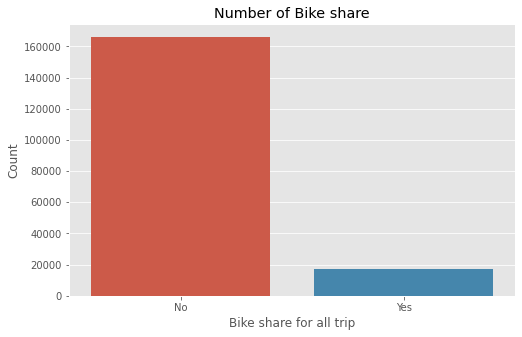

In [26]:
plt.figure(figsize=[8,5])
sns.countplot(data=df,x='bike_share_for_all_trip')
plt.title('Number of Bike share')
plt.xlabel('Bike share for all trip')
plt.ylabel('Count');

> We can see that most of users don't share the bike for all trip.

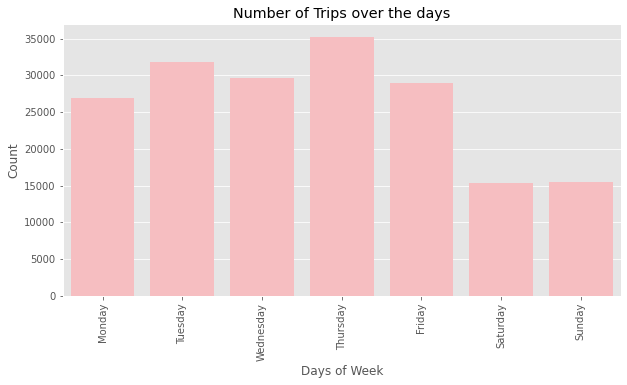

In [27]:
plt.figure(figsize=[10,5])
#df['start_time_day'].plot(kind='bar')
sns.countplot(data=df,x='start_time_day',color=sns.color_palette()[6])
plt.xticks(rotation=90)
plt.title("Number of Trips over the days")
plt.xlabel("Days of Week")
plt.ylabel('Count');

> Over February, Most of trips are on Thursday and on Sunday and Saturday the small number of trips. 

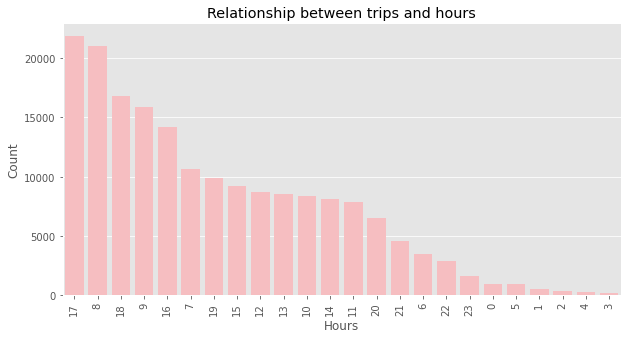

In [28]:
plt.figure(figsize=[10,5])
sns.countplot(data=df,x='start_time_hour',order=df['start_time_hour'].value_counts().index,
              color=sns.color_palette()[6])
plt.xticks(rotation=90)
plt.title("Relationship between trips and hours")
plt.xlabel("Hours")
plt.ylabel('Count');

> We can see that most of trips start at 17 and 8 o'clock, maybe these hours are the start and end of work.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the data show a great visualization and give me more insights about the data but it needs more data and data for difference months and years to be more generalize but here the data for only one month. But in the next exploration i will make more data exploration and i hope that give more insights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, I didn't change the shape of data I only take logarithmic transformation for the duration_sec column after I calculated from it the minutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

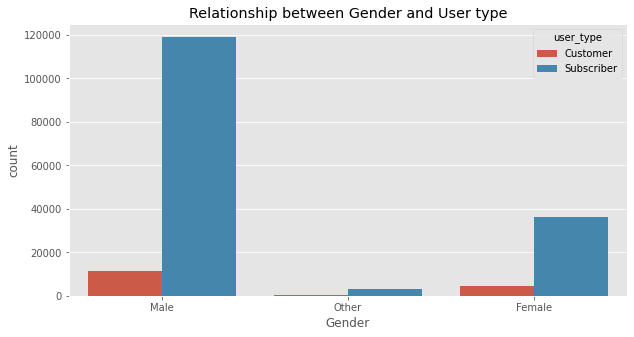

In [29]:
plt.figure(figsize=[10,5])
sns.countplot(data=df ,hue ='user_type',x='member_gender')
plt.title('Relationship between Gender and User type')
plt.xlabel('Gender');

> We can see that male are more than female in both types.

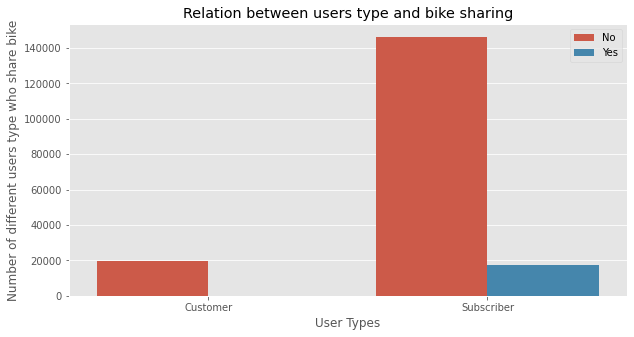

In [30]:
plt.figure(figsize=[10,5])
sns.countplot(data=df,x='user_type',hue='bike_share_for_all_trip')
plt.title('Relation between users type and bike sharing')
plt.xlabel('User Types')
plt.ylabel('Number of different users type who share bike')
plt.legend(loc=1);

In [31]:
df.query("user_type == 'Customer' and bike_share_for_all_trip == 'yes'")

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_day,start_time_hour,duration_min


> After the plot and the query, we can see that no one from the customers share the bike for all trip and all people who share bike for all trip are subscribers. 

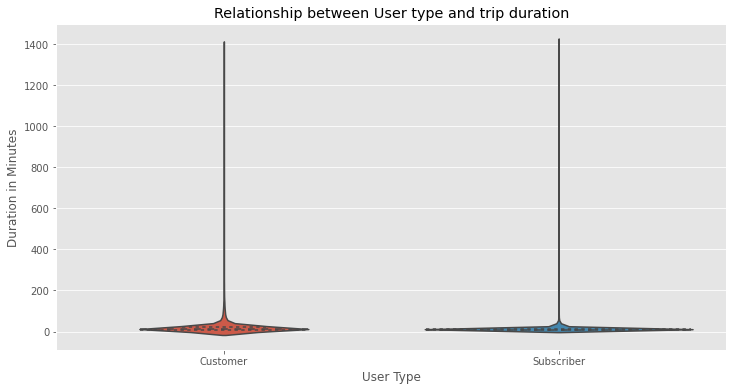

In [32]:
plt.figure(figsize=[12,6])
sns.violinplot(data=df,x='user_type',y='duration_min',inner='quartile')
plt.title("Relationship between User type and trip duration")
plt.xlabel('User Type')
plt.ylabel('Duration in Minutes');

> From the plot we can see that there are lots of outliers, we will consider outliers are the minutes after 60 

In [33]:
outliers = df[df['duration_min'] > 60]
standard = df[df['duration_min'] <= 60]

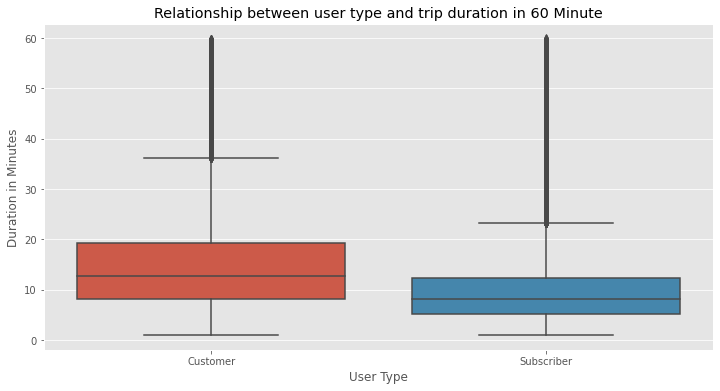

In [34]:
plt.figure(figsize=[12,6])
sns.boxplot(data=standard,x='user_type',y='duration_min')
plt.title('Relationship between user type and trip duration in 60 Minute')
plt.xlabel('User Type')
plt.ylabel('Duration in Minutes');

> We can see the average trip duration for customer is higher than subscriber.   
> We can also say that subscriber's trip seems to be short at time.   
> Violin plots seem to be more difficult than boxplot at interpretation so I didn't use it here.

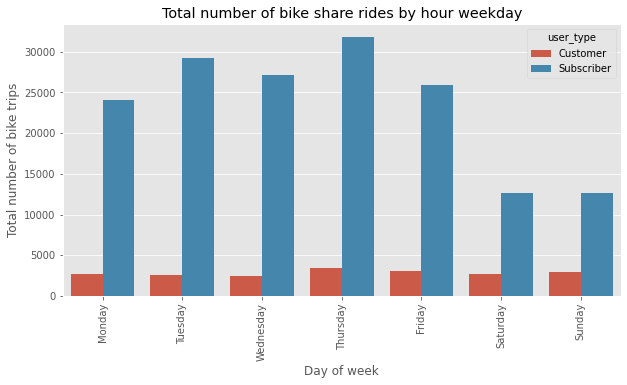

In [35]:
plt.figure(figsize=[10,5])
sns.countplot(data=df,x='start_time_day',hue='user_type')
plt.xticks(rotation=90)
plt.title('Total number of bike share rides by hour weekday')
plt.xlabel('Day of week')
plt.ylabel('Total number of bike trips');

>From the plot for the subscribers users, we can see the effect of weekends on Sunday and Saturday, on the other hand for the customer they don't have weekends effect, the usage for them is consistent.

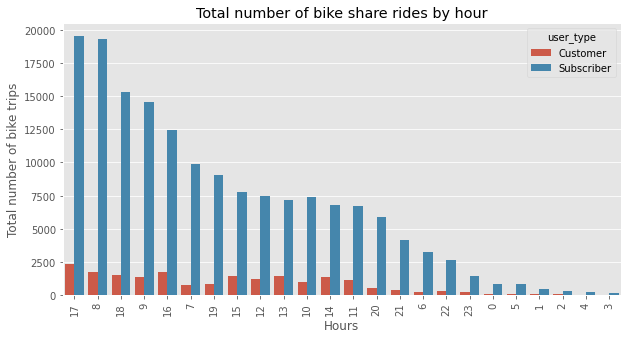

In [36]:
plt.figure(figsize=[10,5])
sns.countplot(data=df,x='start_time_hour',hue='user_type',order=df['start_time_hour'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total number of bike share rides by hour')
plt.xlabel('Hours')
plt.ylabel('Total number of bike trips');

> From the plot for subscriber the peaks for them are centered around commute times (5pm,8am,6pm,9am), on the other hand for customer the peak for them are centered around (5pm ,8am) and the rest of hours look similer no big difference only from(0 am to 5 am) 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The subscriber users tend to have short trips.  
> The customers have a weekend effect on the trips on Sunday and Saturday, otherwise subscriber looks consistent hours per trip are consistent over days of week. 
> The commute times(8am.9am,5pm,6pm) for subscribers have lots of trips and also customers look like it but only at 5 pm and 8 am 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Only the subscribers share bikes for all trip.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [37]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_time_day', 'start_time_hour',
       'duration_min'],
      dtype='object')

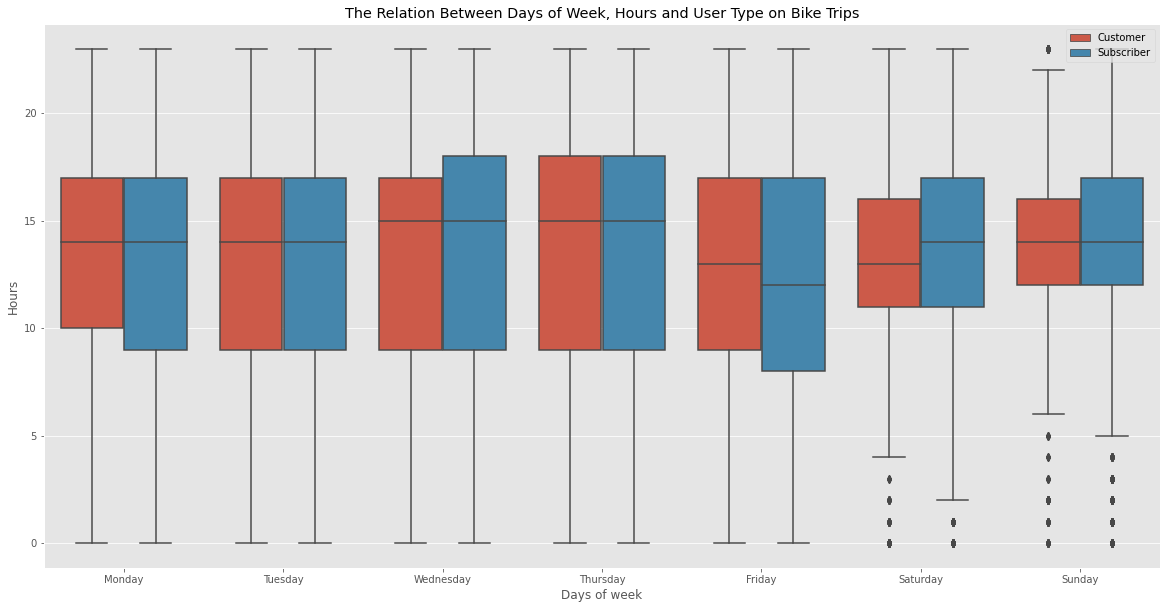

In [38]:
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='start_time_day',y='start_time_hour',hue='user_type')
plt.legend(loc=1)
plt.title('The Relation Between Days of Week, Hours and User Type on Bike Trips')
plt.xlabel('Days of week')
plt.ylabel('Hours');

> From the plot, for subscriber the range for start hours per most of days at 9 am only weekdaysat 11am and 12pm, and for Friday it's 8am.    
> For customers the range for start hours seems to be consistent only the weekends.

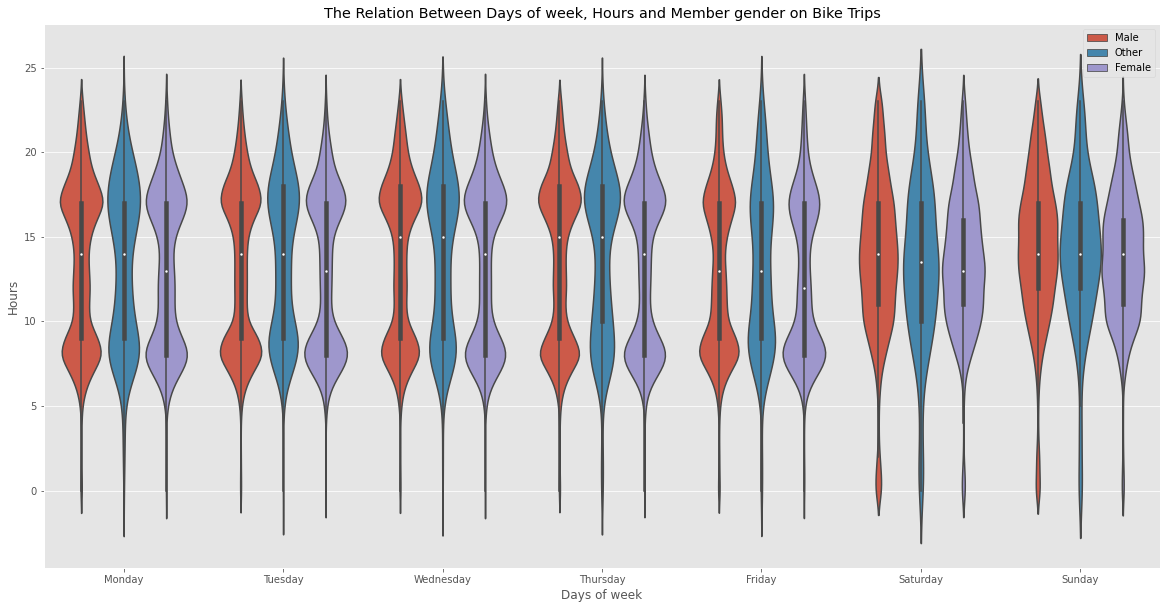

In [39]:
plt.figure(figsize=[20,10])
sns.violinplot(data=df,x='start_time_day',y='start_time_hour',hue='member_gender')
plt.legend(loc=1)
plt.title('The Relation Between Days of week, Hours and Member gender on Bike Trips')
plt.xlabel('Days of week')
plt.ylabel('Hours');

>From the plot, we can see the start hours are same for different genders, we can see big peaks at commute time for both , and during the day narrow peak.   
>At weekends the start hours diff

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Unlike what I did before in Bivariate where I excluded outliers for durations for trip, here I took all the data so I found something different.  
> Subscribers have lots of trip but long trip for customer

### Were there any interesting or surprising interactions between features?

> Although the column member_gender has lots of missing values ,but when I used it I found that females have short trip and male have long trip.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [40]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'Your_Slide_Deck_Name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output